In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

## 5. How many rows and columns are in gdp_df? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


Answer: 4 Columns and 8219 Rows

## 6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df= gdp_df.drop(columns = ['Value Footnotes'])

In [5]:
gdp_df=gdp_df.rename(columns = {
    'Country or Area':'Country',
    'Value':'gdp_per_capita'
    })
    

In [6]:
gdp_df

,Country,Year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## 7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
countries = gdp_df.groupby('Country')['Year'].count().reset_index()

In [8]:
countries.max()

Country    Zimbabwe
Year             34
dtype: object

In [9]:
countries[countries['Year']==34].count()

Country    228
Year       228
dtype: int64

In [10]:
countries[countries['Year']<34].count()

Country    19
Year       19
dtype: int64

## 8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

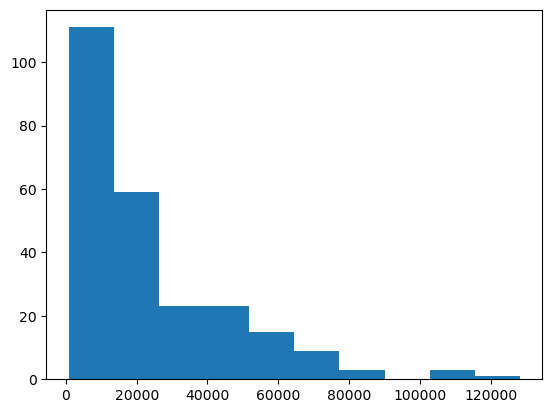

In [12]:
plt.hist(gdp_2020['gdp_per_capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x169bec4c550>,
 'caps': [<matplotlib.lines.Line2D at 0x169bec4c7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169bec4c410>],
 'medians': [<matplotlib.lines.Line2D at 0x169bec4ca50>],
 'fliers': [<matplotlib.lines.Line2D at 0x169bec4cb90>],
 'means': []}

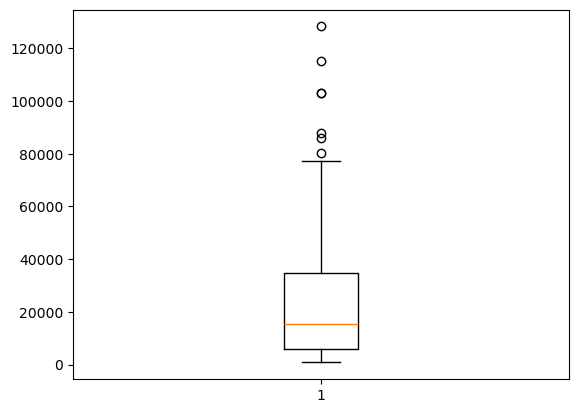

In [13]:
plt.boxplot(gdp_2020['gdp_per_capita'])

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x169be3ec2f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x169be3ed400>,
 'cmins': <matplotlib.collections.LineCollection at 0x169becb4690>,
 'cbars': <matplotlib.collections.LineCollection at 0x169becb4a50>}

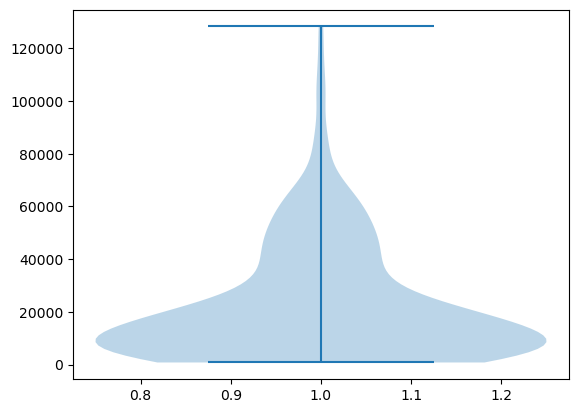

In [14]:
plt.violinplot(gdp_2020['gdp_per_capita'])

<Axes: xlabel='gdp_per_capita', ylabel='Density'>

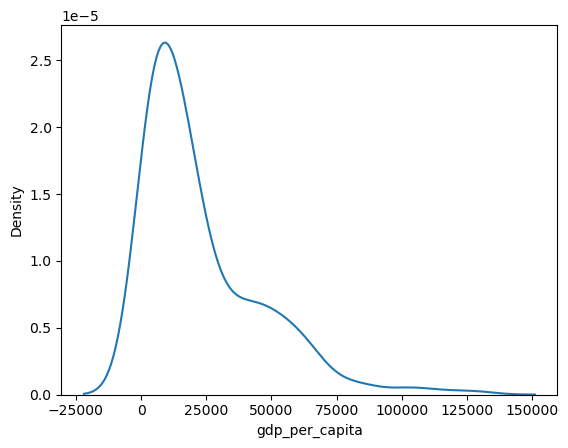

In [15]:
sns.kdeplot(gdp_2020['gdp_per_capita'])

## 9. What was the median GDP per capita value in 2020?

In [16]:
gdp_2020['gdp_per_capita'].median()

15309.23598817024

## For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

## A boxplot
## A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
## A scatterplot
## A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
## Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [17]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1970, 1980, 1990, 2000, 2010, 2020])]

## 11. Which country was the first to have a GDP per capita greater than $100,000

In [18]:
high_gdp = gdp_df[gdp_df['gdp_per_capita'] > 100000].sort_values(by = 'Year', ascending = True)

## 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [24]:
gdp_high_2020 = gdp_2020.sort_values(by = 'gdp_per_capita', ascending = False)

## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [31]:
gdp_low_2020 = gdp_2020.sort_values(by = 'gdp_per_capita', ascending = True)

In [32]:
gdp_low_2020.head()

,Country,Year,gdp_per_capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


## 14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.